# Introduction to Seaborn

Seaborn is a Python library for **statistical data visualization**. It is built on top of matplotlib and provides a **high-level interface** for creating informative, attractive, and concise plots. Seaborn works especially well with **pandas DataFrames** and is widely used for **exploratory data analysis (EDA)** in data science and machine learning.

Its main advantage is that it allows users to focus on the **meaning of the data**, rather than on low-level plotting details.



# Data Formats in Seaborn

Seaborn mainly works with **vector-based data**, meaning that each plotted variable should be a sequence of values. There are three important data structures to understand: **long-form data**, **wide-form data**, and **messy (mixed) data**.

![DataStructures](https://seaborn.pydata.org/_images/data_structure_19_0.png)



## Long-form Data

Long-form data follows the principles of *tidy data*.

Each variable is stored in a **separate column**, and each observation is stored in a **separate row**.

### Example structure

| year | month | passengers |
| --- | --- | --- |
| 1949 |   Jan |        112 |
| 1949 |   Feb |        118 |

### Example code

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

flights = sns.load_dataset("flights")
print(type(flights))
print(flights.head())

# sns.lineplot(
#     data=flights,
#     x="year",
#     y="passengers",
#     hue="month"
# )

<class 'pandas.core.frame.DataFrame'>
   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


### Why long-form data is preferred

* Variables are explicitly named.
* Plot behavior is predictable.
* The same dataset can be reused for many different plots.
* It scales well to complex datasets.

## Wide-form Data

Wide-form data resembles a spreadsheet layout.

One variable is stored in the **row index**, another in the **columns**, and values fill the table cells.

### Example structure

| year | Jan | Feb | Mar |
| ---- | --- | --- | --- |
| 1949 | 112 | 118 | 132 |
| 1950 | 115 | 126 | 141 |

### Example code

In [62]:
flights_wide = flights.pivot(
    index="year",
    columns="month",
    values="passengers"
)
print(flights_wide.head())

# sns.lineplot(data=flights_wide)
# plt.show()

month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
1949   112  118  132  129  121  135  148  148  136  119  104  118
1950   115  126  141  135  125  149  170  170  158  133  114  140
1951   145  150  178  163  172  178  199  199  184  162  146  166
1952   171  180  193  181  183  218  230  242  209  191  172  194
1953   196  196  236  235  229  243  264  272  237  211  180  201


### Important notes about wide-form data

* Seaborn automatically assigns roles to rows and columns.
* Variable names are not explicitly available.
* Plot behavior depends on the plot type and may be less predictable.
* It is suitable only for simple datasets.

## Messy (Mixed) Data

Messy data does not clearly follow either the long-form or wide-form structure.

Variables may be **spread across multiple columns**, making it unclear which values belong to which variable.

### Example of messy data

The `anagrams` dataset is considered *messy (not tidy)* because the level of difficulty is encoded in the column names (`num1`, `num2`, `num3`) instead of being stored as values in a single column. As a result, one logical variable is split across multiple columns, which makes analysis and visualization harder and requires reshaping the data into long-form.

In [63]:
anagrams = sns.load_dataset("anagrams")
anagrams.head()

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8


### Convert to long-form data

The `melt()` function is used to **transform wide or messy data into long-form data**. It does this by **collapsing multiple columns into two new columns**: one for variable names and one for their values.

#### Conceptual explanation

When using `melt()`:

* Some columns are kept **as identifiers** (they describe each observation).
* Other columns are **unpivoted** into rows.
* Column names become values in a new column.
* Cell values become values in another new column.

In other words, `melt()` turns “columns into rows”.

### Example: Melting the data

In [64]:
anagrams_long = anagrams.melt(
    id_vars=["subidr", "attnr"],            # specifies the columns that **identify each observation** and should remain unchanged
    value_vars=["num1", "num2", "num3"],    # specifies the columns that will be **collapsed into rows**
    var_name="num_solutions",               # defines the name of the new column that will store the former column names
    value_name="score"                      # defines the name of the new column that will store the data values
)

anagrams_long.head()

,subidr,attnr,num_solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0


# Overview of Seaborn Plot Types and Functions

Most work with Seaborn is done using its **plotting functions**. These functions are organized in two important ways:

1. By the **type of data they visualize** (relationships, distributions, categories).
2. By the **level at which they operate**: **axes-level** or **figure-level**.

Understanding this distinction is essential for using Seaborn effectively.

## Types of Plots in Seaborn

![ToPiS](https://seaborn.pydata.org/_images/function_overview_8_0.png)

Seaborn groups plots into three main conceptual categories:

### Relational plots

These plots show **relationships between numeric variables**.

* Examples: scatter plots, line plots
* Common functions: `scatterplot`, `lineplot`, `relplot`

### Distribution plots

These plots show **how values are distributed**.

* Examples: histograms, density plots
* Common functions: `histplot`, `kdeplot`, `displot`

### Categorical plots

These plots compare **groups or categories**.

* Examples: box plots, bar plots, violin plots
* Common functions: `boxplot`, `barplot`, `violinplot`, `catplot`

## Axes-level vs. Figure-level Functions

Seaborn functions can also be divided into **axes-level** and **figure-level** functions.

This distinction describes **who controls the figure and axes**.



## Axes-level Functions

Axes-level functions draw a plot on **one existing Matplotlib Axes object**.

They behave similarly to Matplotlib functions and are easy to combine into complex figures.

### Key properties

* They return a `matplotlib.axes.Axes` object.
* They modify only the axes they draw on.
* They accept the argument `ax=`.

### Example: Axes-level plotting




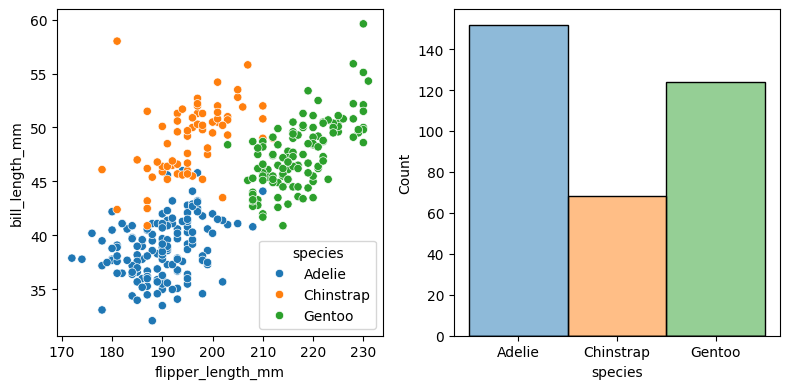

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")

# Create a figure with two axes
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Scatter plot on the first axes
sns.scatterplot(
    data=penguins,
    x="flipper_length_mm",
    y="bill_length_mm",
    hue="species",
    ax=axs[0]  # Explicitly specify the axes
)

# Histogram on the second axes
sns.histplot(
    data=penguins,
    x="species",
    hue="species",
    ax=axs[1], # Explicitly specify the axes
    legend=False
)

plt.tight_layout()
plt.show()



Axes-level functions are ideal when you need **precise control** over layout and composition.



## Figure-level Functions

Figure-level functions **create and manage the entire figure**.

They do not draw on existing axes. Instead, they create a Seaborn object (usually a **FacetGrid**) that controls the figure.

### Key properties

* They create their own figure.
* They return a Seaborn object (not an Axes).
* They support faceting using `row=` and `col=`.
* They cannot be placed inside an existing subplot layout.



### Example: Figure-level distribution plot




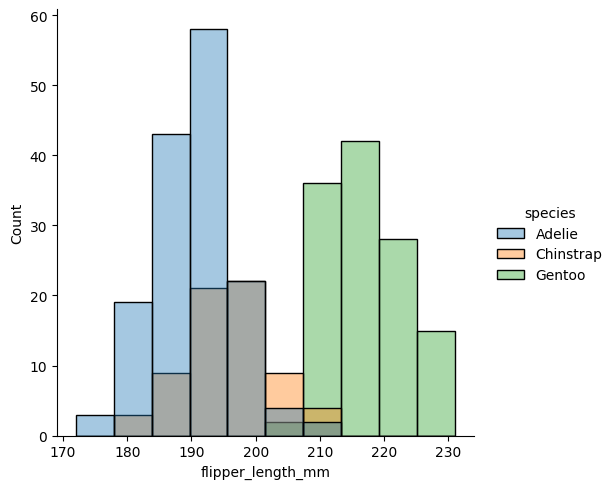

In [66]:
# Draw a histogram using the figure-level function
sns.displot(
    data=penguins,
    x="flipper_length_mm",
    hue="species",
    multiple="layer",
    alpha=0.4
)

Internally, this function uses `histplot`, but it manages the figure automatically.

## What Is FacetGrid?

**FacetGrid** is a Seaborn object that manages a **grid of subplots**.

Each subplot (called a *facet*) shows the **same type of plot**, but for a **different subset of the data**.

FacetGrid makes it easy to compare patterns across categories.



### Faceting example




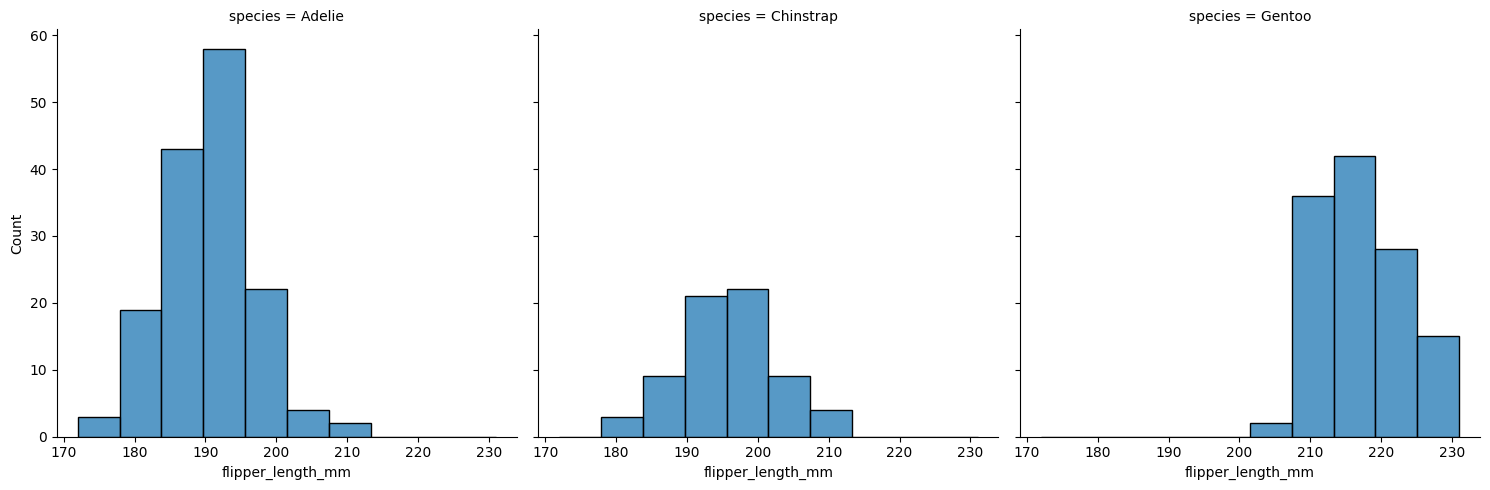

In [67]:
# Create separate plots for each species using columns
sns.displot(
    data=penguins,
    x="flipper_length_mm",
    col="species"
)



In this example:

* Each column represents one species.
* All plots share the same axes and scale.
* Comparisons are easier and more reliable.

This is one of the main advantages of figure-level functions.



## Why Figure-level Functions Are Different

Figure-level functions **own their figure**.

This design allows Seaborn to:

* Place legends outside the plot.
* Control spacing and alignment.
* Automatically create multiple subplots.

However, this also means they are **not easily combined** with other plots.

# Combining multiple views on the data

Some seaborn plotting functions do not fit cleanly into the distinction between relational, distributional, and categorical plots. These functions are designed to **combine multiple views of the data within a single figure**, allowing different aspects of the same variables to be visualized simultaneously.

The two most important functions in this category are **`jointplot()`** and **`pairplot()`**. Both are **figure-level functions**, meaning that they create and manage their own figures with multiple subplots. However, they rely on different underlying objects to organize the figure.

## `jointplot()` and `JointGrid`

The function `jointplot()` is used to visualize the **relationship between two variables**, together with their **univariate distributions**.

It creates:

* one central plot showing the joint relationship, and
* two marginal plots showing the distribution of each variable separately.

Internally, `jointplot()` creates a **`JointGrid`** object, which manages three axes: one for the joint plot and two for the marginal plots.

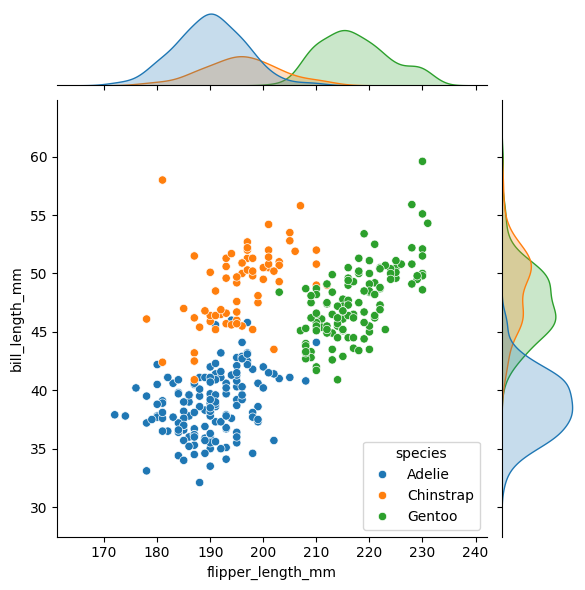

In [68]:
import seaborn as sns

penguins = sns.load_dataset("penguins")

# Create a joint plot showing the relationship between two numeric variables
sns.jointplot(
    data=penguins,
    x="flipper_length_mm",   # Variable mapped to the x-axis
    y="bill_length_mm",      # Variable mapped to the y-axis
    hue="species"            # Group (color) observations by species
)

By default, the joint plot uses a scatter plot, while the marginal plots show univariate distributions.

## `pairplot()` and `PairGrid`

While `jointplot()` focuses on a **single pair of variables**, `pairplot()` generalizes this idea to **all pairwise combinations of variables** in a dataset.

It creates a grid of plots in which:

* each off-diagonal subplot shows the relationship between two variables, and
* each diagonal subplot shows the univariate distribution of a single variable.

Internally, `pairplot()` creates a **`PairGrid`** object, which manages a square grid of axes.




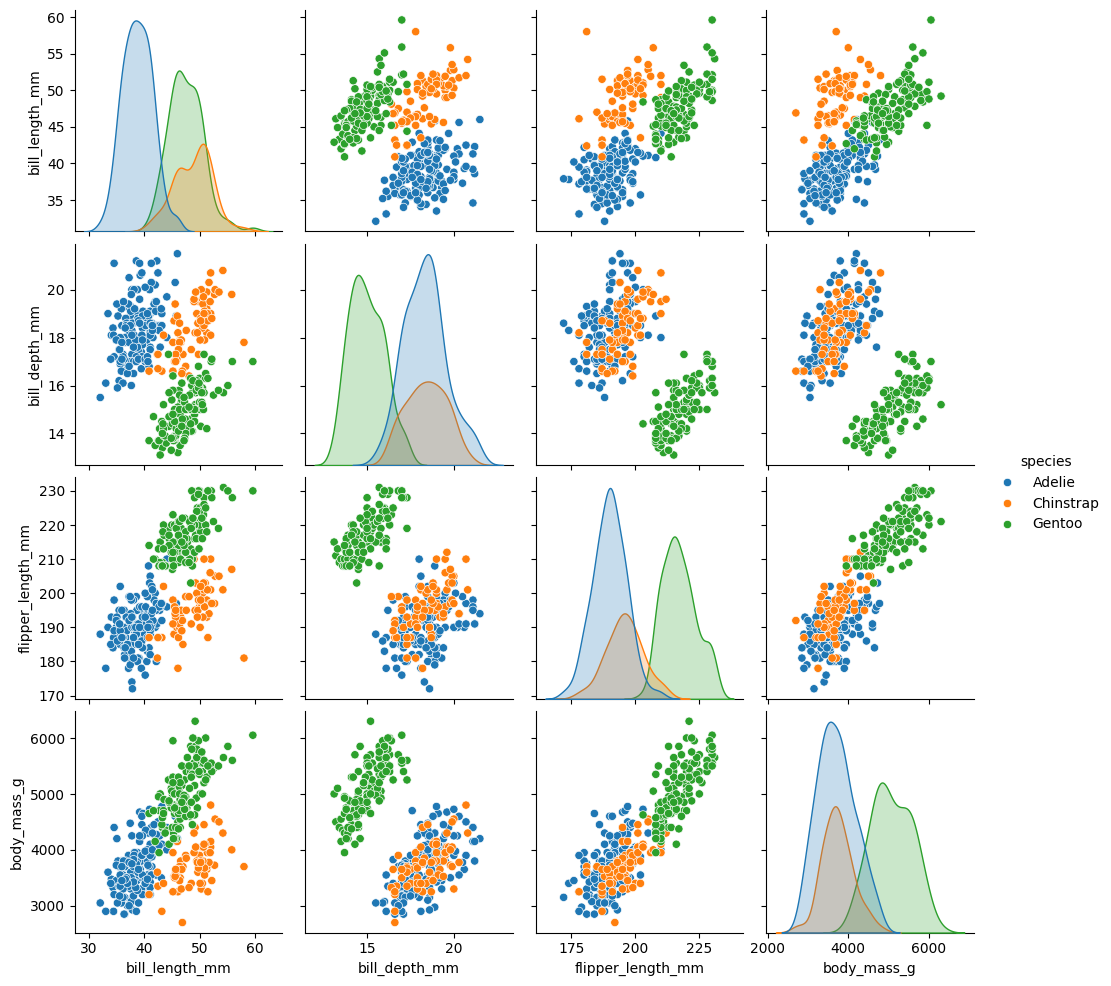

In [69]:
# Visualize all pairwise relationships between numeric variables
sns.pairplot(
    data=penguins,
    hue="species"   # Use color to distinguish species across all plots
)



This function is particularly useful during **exploratory data analysis**, when the goal is to quickly assess correlations, clustering patterns, or potential outliers.

# Visualizing Statistical Relationships

Statistical analysis is about understanding **how variables are related** and how these relationships change depending on other variables. Visualization plays a central role in this process because well-designed plots allow us to **see patterns, trends, and structure** that may not be obvious from numbers alone.

In seaborn, one of the most important tools for this task is **`relplot()`**.
It is a **figure-level function** designed to visualize relationships between variables using two main plot types:

* **scatter plots** (`kind="scatter"`, the default)
* **line plots** (`kind="line"`)

Internally, `relplot()` combines a `FacetGrid` with either `scatterplot()` or `lineplot()`.
These plots are powerful because they represent two variables directly on the axes and can encode up to **three additional variables** using color (`hue`), size (`size`), and style (`style`).



## Relating Variables with Scatter Plots

A scatter plot shows the **joint distribution** of two variables.
Each point corresponds to one observation, allowing us to visually assess whether the variables are related.



## Dataset: `tips`

The `tips` dataset contains information about restaurant bills and tips.
Important columns include:

* `total_bill`: total bill amount
* `tip`: tip given
* `smoker`: whether there was a smoker at the table
* `time`: lunch or dinner
* `size`: party size




In [70]:
import seaborn as sns

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4






### Basic scatter plot




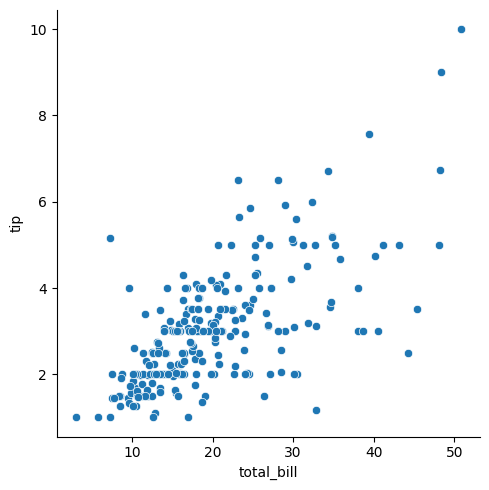

In [71]:
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
);



**What we can learn from this plot:**
We can observe a clear positive relationship between the total bill and the tip amount. Larger bills tend to be associated with larger tips, although there is variability around this trend.



### Adding a third variable with color (`hue`)




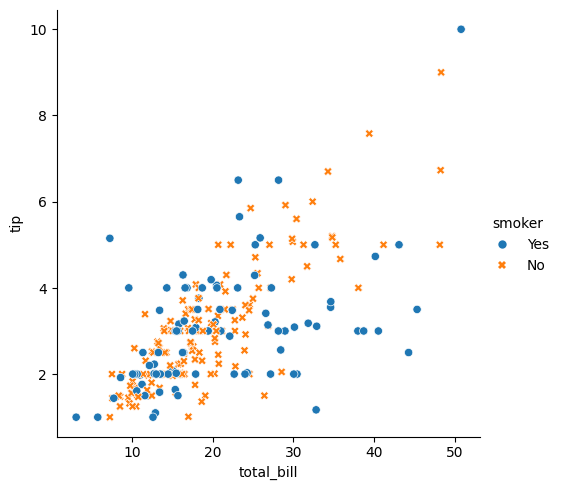

In [72]:
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="smoker",
    style="smoker"
)

**What we can learn from this plot:**
This plot allows us to compare tipping behavior between smokers and non-smokers. We can see whether one group consistently tips more or less than the other across different bill sizes.

### Mapping multiple semantics (with caution)

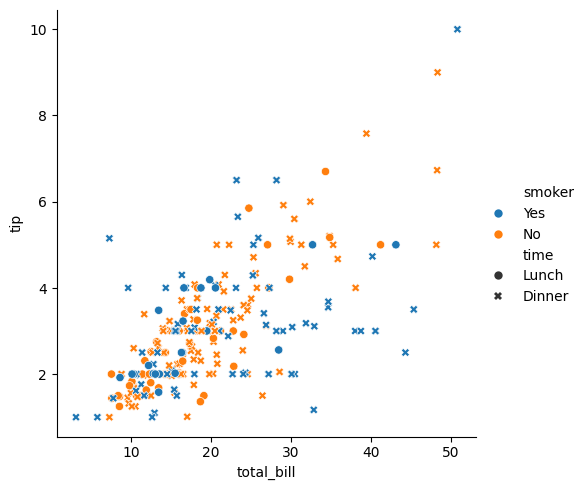

In [73]:
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="smoker",
    style="time"
)

**What we can learn from this plot:**
We can compare tipping patterns across smokers and non-smokers while also distinguishing lunch and dinner observations. This makes it possible to see whether time of day modifies the relationship between bill size and tips.

### Encoding a variable with point size

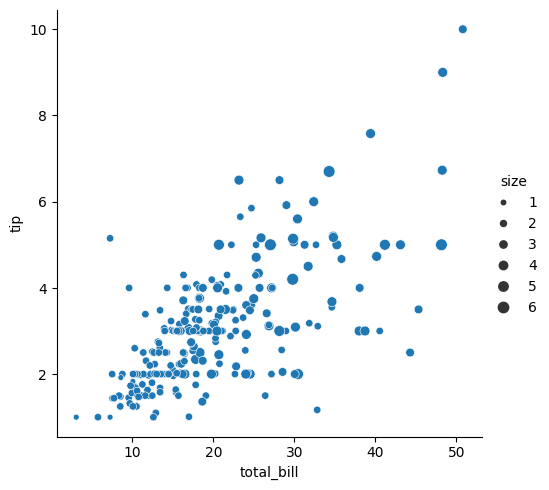

In [74]:
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    size="size"
)



**What we can learn from this plot:**
Point size emphasizes the presence of larger groups. This helps reveal how group size relates to spending and tipping behavior without relying on color.






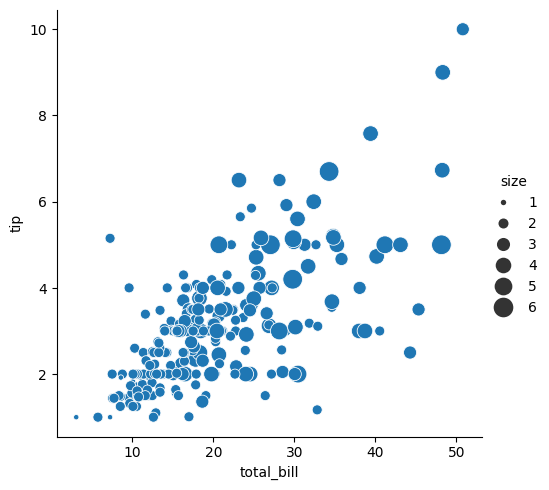

In [75]:
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    size="size",
    sizes=(15, 200)
)



**What we can learn from this plot:**
Adjusting the size range makes differences in party size more visually prominent, which can help detect clusters of small versus large groups.



## Emphasizing Continuity with Line Plots

Scatter plots are not always ideal.
When one variable represents **time or another ordered continuum**, a line plot often communicates changes more clearly.



## Dataset: `dowjones`

The `dowjones` dataset contains historical stock prices.
Key columns include:

* `Date`: trading date
* `Price`: closing price




In [76]:
dowjones = sns.load_dataset("dowjones")
dowjones.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45






### Basic line plot




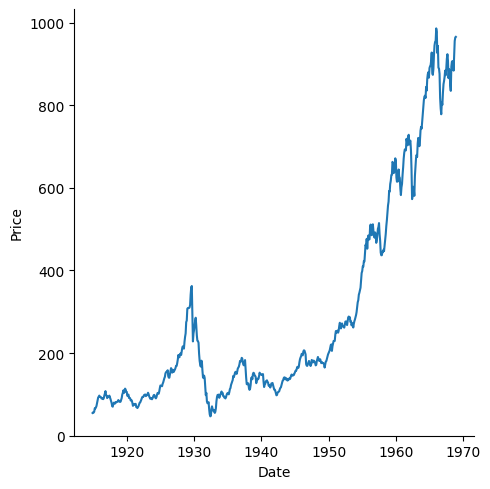

In [77]:
sns.relplot(
    data=dowjones,
    x="Date",
    y="Price",
    kind="line"
)



**What we can learn from this plot:**
This plot reveals long-term trends, fluctuations, and periods of rapid change in stock prices over time.



## Aggregation and Uncertainty in Line Plots

When multiple observations exist for the same x value, seaborn aggregates the data by default.



## Dataset: `fmri`

The `fmri` dataset contains repeated measurements of brain signals over time.
Key columns include:

* `timepoint`
* `signal`
* `event`, `region`, `subject`




In [78]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970






### Default aggregation (mean + confidence interval)




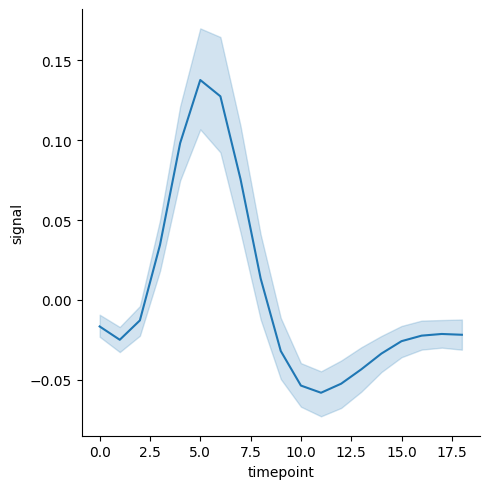

In [79]:
sns.relplot(
    data=fmri,
    x="timepoint",
    y="signal",
    kind="line",
    # errorbar=None
    # errorbar="sd"
)



**What we can learn from this plot:**
We see the average signal trajectory over time along with uncertainty, which helps assess the stability and variability of the response.


### Disabling aggregation entirely

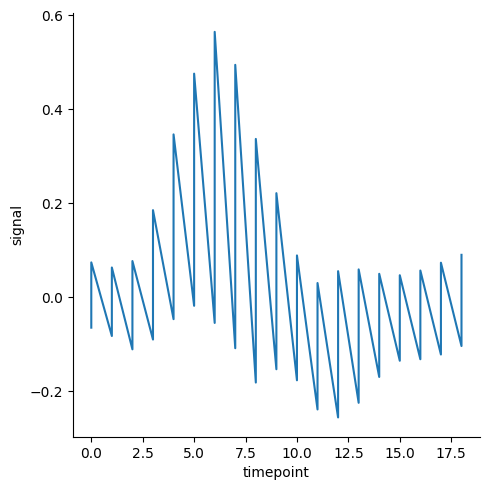

In [80]:
sns.relplot(
    data=fmri,
    x="timepoint",
    y="signal",
    kind="line",
    estimator=None
)

**What we can learn from this plot:**
Individual trajectories become visible, allowing us to assess subject-level variability and detect outliers.

### Using markers 

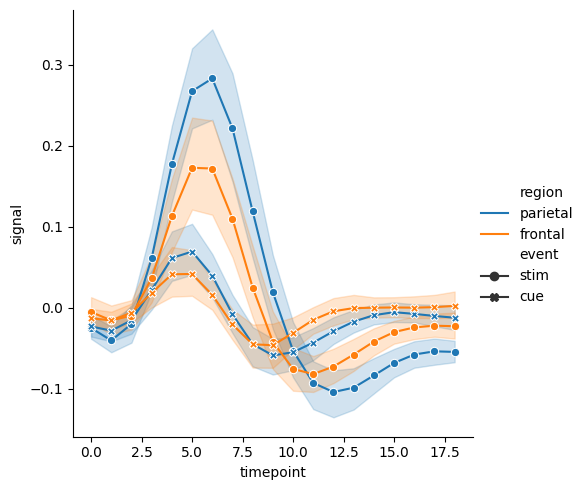

In [ ]:
sns.relplot(
    data=fmri,
    x="timepoint",
    y="signal",
    hue="region",
    style="event",
    kind="line",
    markers=True
)


**What we can learn from this plot:**
Markers make individual observations more visible, which is useful when lines fluctuate rapidly.


## Sorting and Orientation

## Dataset: `healthexp`

This dataset includes health spending and life expectancy data.
Key columns include:

* `Spending_USD`
* `Life_Expectancy`
* `Country`




In [83]:
healthexp = sns.load_dataset("healthexp")
healthexp.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


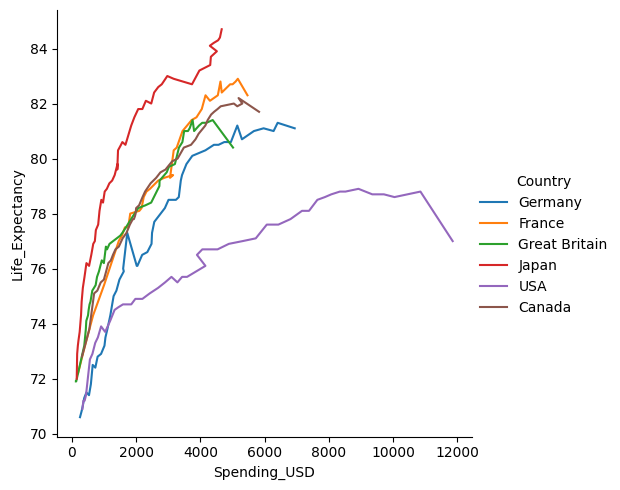

In [86]:
sns.relplot(
    data=healthexp,
    x="Spending_USD",
    y="Life_Expectancy",
    hue="Country",
    sort=False,
    kind="line"
)



**What we can learn from this plot:**
Disabling sorting preserves the original data order, which may reflect meaningful sequences such as historical progression.






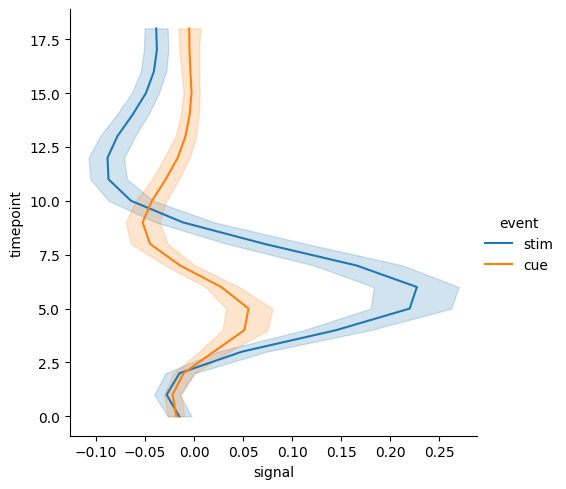

In [26]:
sns.relplot(
    data=fmri,
    x="signal",
    y="timepoint",
    hue="event",
    orient="y",
    kind="line"
)



**What we can learn from this plot:**
Changing orientation allows us to interpret the signal as a function of time in a rotated coordinate system.



## Showing Multiple Relationships with Facets




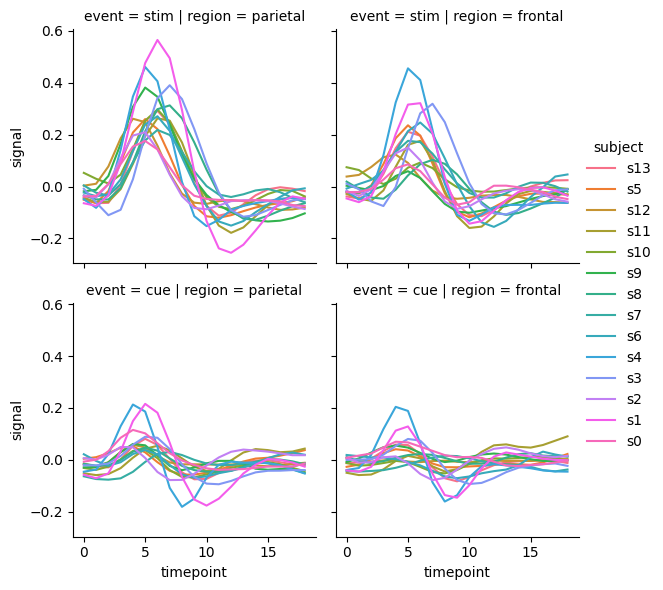

In [ ]:
sns.relplot(
    data=fmri,
    x="timepoint",
    y="signal",
    hue="subject",
    col="region",
    row="event",
    height=3,
    kind="line"
)



**What we can learn from this plot:**
This layout reveals how signals vary jointly across brain regions and experimental conditions.






# Visualizing Distributions of Data

A fundamental step in data analysis is understanding **how individual variables are distributed**. Distribution visualizations help answer questions such as:

* What values occur most often?
* What is the overall range of the data?
* Is the distribution skewed or symmetric?
* Are there multiple modes?
* Are there extreme or unusual observations?
* Do distributions differ across groups?

Seaborn provides a dedicated **distributions module** to support this type of analysis.
The main axes-level functions are:

* `histplot()`
* `kdeplot()`
* `ecdfplot()`
* `rugplot()`

These are grouped into figure-level functions such as `displot()`, `jointplot()`, and `pairplot()`.



## Univariate Histograms

### Dataset: `penguins`

The `penguins` dataset contains measurements of penguins from different species.
Relevant columns include:

* `flipper_length_mm`
* `bill_length_mm`
* `bill_depth_mm`
* `species`
* `sex`




In [28]:
import seaborn as sns

penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female






### Basic histogram




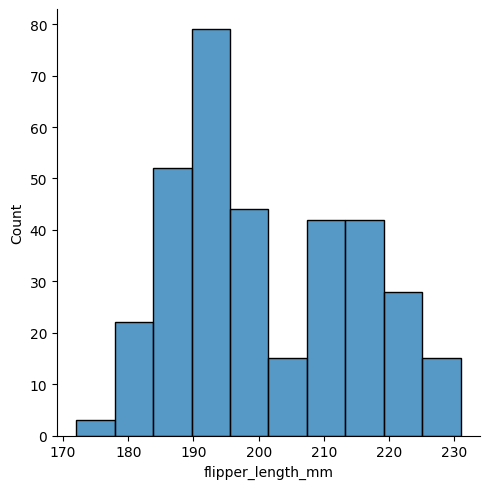

In [29]:
sns.displot(
    data=penguins,
    x="flipper_length_mm"
)



**What we can learn from this plot:**
We can see the typical range of flipper lengths and identify the most common values. The distribution appears bimodal, suggesting that multiple subpopulations (likely species) are present.



## Choosing the Bin Size

Bin size strongly affects how a histogram appears and how we interpret it.

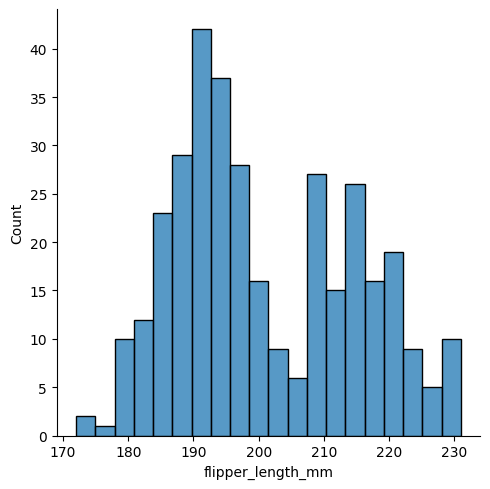

In [30]:
sns.displot(
    data=penguins,
    x="flipper_length_mm",
    binwidth=3
)

### Controlling number of bins




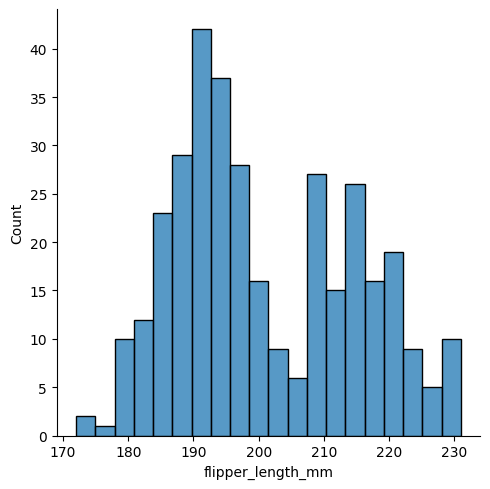

In [31]:
sns.displot(
    data=penguins,
    x="flipper_length_mm",
    bins=20
)




**What we can learn from this plot:**
Using a fixed number of bins provides a smoother summary, but fine structure may be lost if the bins are too wide.

### Categorical variable as histogram

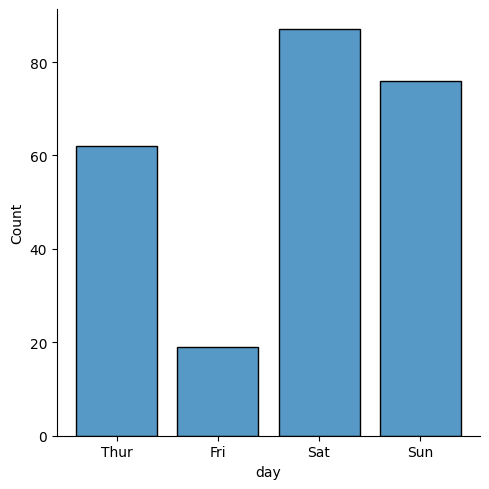

In [32]:
tips = sns.load_dataset("tips")
tips.head()

sns.displot(
    data=tips,
    x="day",
    shrink=0.8
)




**What we can learn from this plot:**
This visualization shows how observations are distributed across days of the week while emphasizing that the x-axis is categorical.



## Conditioning on Other Variables

### Conditioning with `hue`




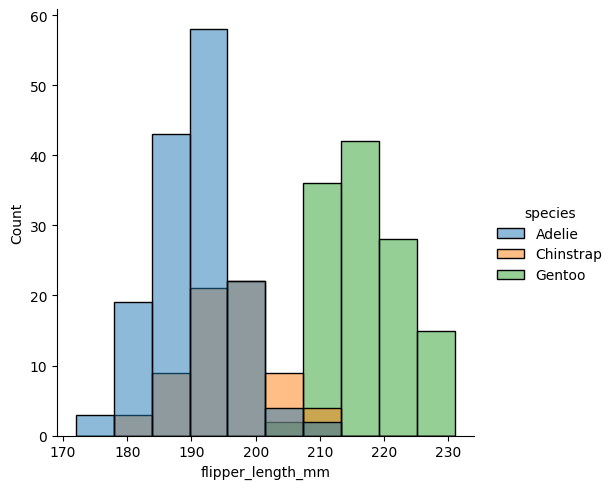

In [88]:
sns.displot(
    data=penguins,
    x="flipper_length_mm",
    hue="species"
)




**What we can learn from this plot:**
The bimodal structure can now be explained by differences between species, each contributing its own distribution.

### Dodged histograms

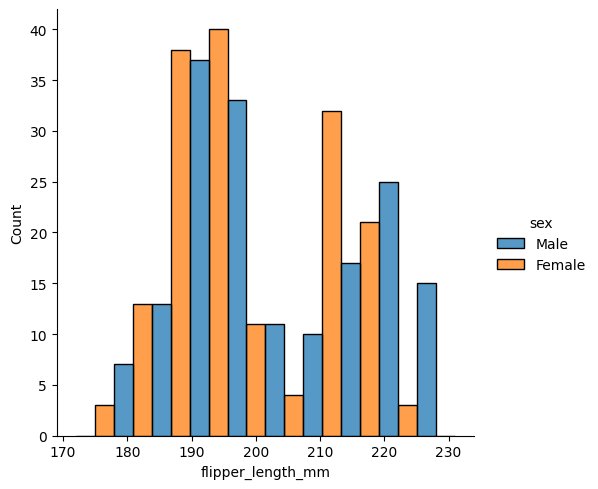

In [34]:
sns.displot(
    data=penguins,
    x="flipper_length_mm",
    hue="sex",
    multiple="dodge"
)

**What we can learn from this plot:**
Side-by-side bars allow direct comparison of counts between groups, provided there are only a few categories.

# Visualizing Categorical Data

In many datasets, one or more key variables are **categorical**.

Seaborn provides **categorical plotting functions** at two levels:

* **axes-level functions**
* a **figure-level interface**, `catplot()`

Categorical plots fall into three families:

1. **Categorical scatter plots**
2. **Categorical distribution plots**
3. **Categorical estimate plots**



## Categorical Scatter Plots

### Dataset: `tips`




In [35]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4






### Strip plot




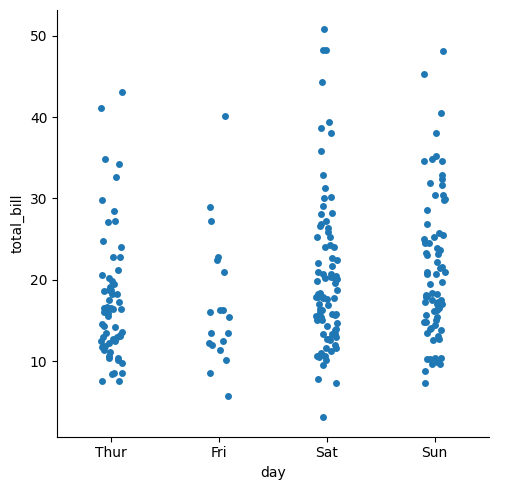

In [36]:
sns.catplot(
    data=tips,
    x="day",
    y="total_bill"
)

**What we can learn:**
Shows individual observations and their spread within each category; overlap indicates high density.

### Axis orientation




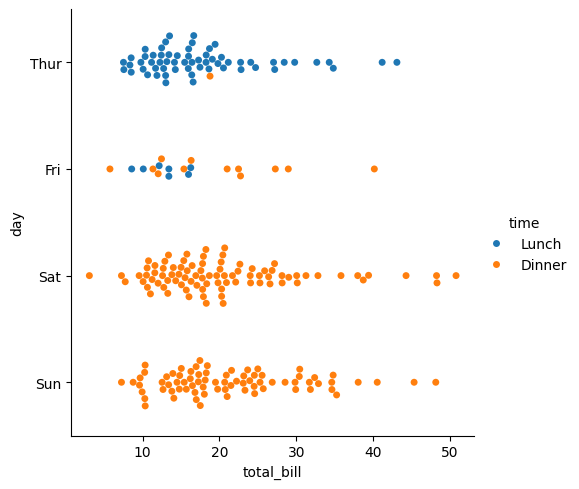

In [37]:
sns.catplot(
    data=tips,
    x="total_bill",
    y="day",
    hue="time",
    kind="swarm"
)

**What we can learn:**
Placing categories on the y-axis improves readability when labels are long or numerous.

# Bonus: Building Structured Multi-Plot Grids in Seaborn

When working with **multi-dimensional datasets**, a single plot is often not enough.
A common strategy is to use **small multiples**: the same plot repeated for different subsets of the data.

Seaborn supports this pattern through **grid objects**, which link:

* the **layout of the figure**
* with the **structure of the dataset**

Most figure-level functions (`relplot`, `displot`, `catplot`) are built on top of these grids.



## `FacetGrid`: conditional small multiples

### What is `FacetGrid`?

`FacetGrid` is used when you want to show:

* the **same relationship**
* for **different subsets** of the data

Faceting dimensions:

* `row` – split vertically
* `col` – split horizontally
* `hue` – grouping inside each subplot (color)



### Dataset: `tips`




In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4






## Step 1: Create the grid (no plotting yet)




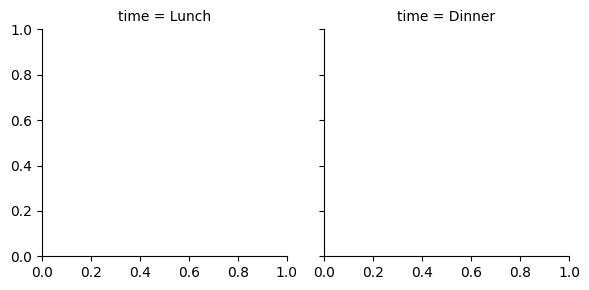

In [39]:
g = sns.FacetGrid(tips, col="time")



**What happens here:**

* seaborn creates the figure and axes layout
* data is *not* drawn yet
* plotting is deferred to `map()`

This separation is the key design idea of `FacetGrid`.



## Step 2: Map a plotting function




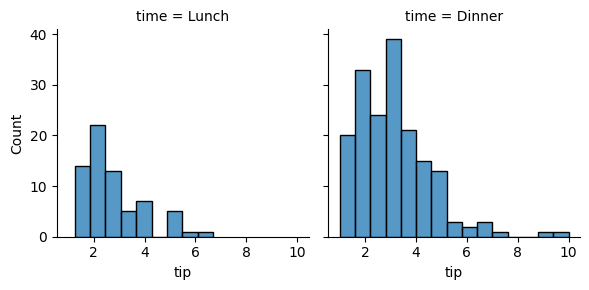

In [ ]:
g = sns.FacetGrid(tips, col="time")
g.map(sns.histplot, "tip")



**What happens here:**

* `map()` loops over subsets defined by `col="time"`
* `"tip"` is passed as a column name, not raw data
* seaborn handles filtering automatically



## Adding grouping inside facets (`hue`)




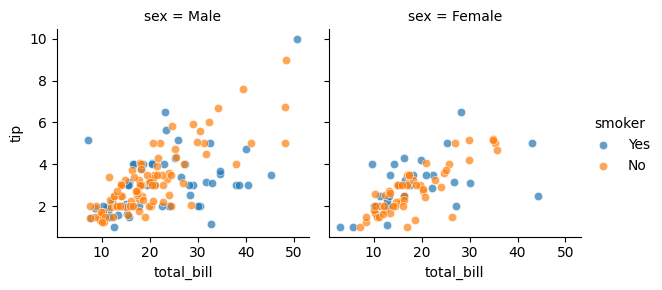

In [41]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=0.7)
g.add_legend()



**Key ideas:**

* `col` controls *which subplot*
* `hue` controls *color inside each subplot*
* legends must be added explicitly



## Controlling layout and size




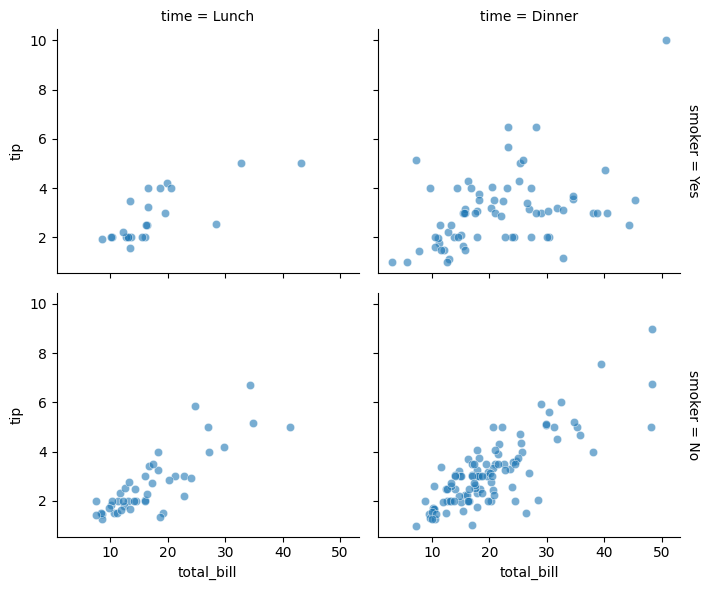

In [42]:
# Create a grid of subplots (facets) based on categorical variables
g = sns.FacetGrid(
    tips,              # dataset used for all facets
    row="smoker",      # split rows by smoker status (Yes / No)
    col="time",        # split columns by time (Lunch / Dinner)
    height=3,          # height (in inches) of each subplot
    aspect=1.2,        # width = height * aspect (controls subplot shape)
    margin_titles=True # put row/column titles on the margins
)

# Map the same plotting function to each facet
g.map(
    sns.scatterplot,   # plotting function to apply
    "total_bill",      # x-axis variable (bill amount)
    "tip",             # y-axis variable (tip amount)
    alpha=0.6          # point transparency (reduces overplotting)
)

**What these parameters do:**

* `row`, `col` → grid structure
* `height`, `aspect` → size of each facet
* `margin_titles=True` → cleaner labels for grids

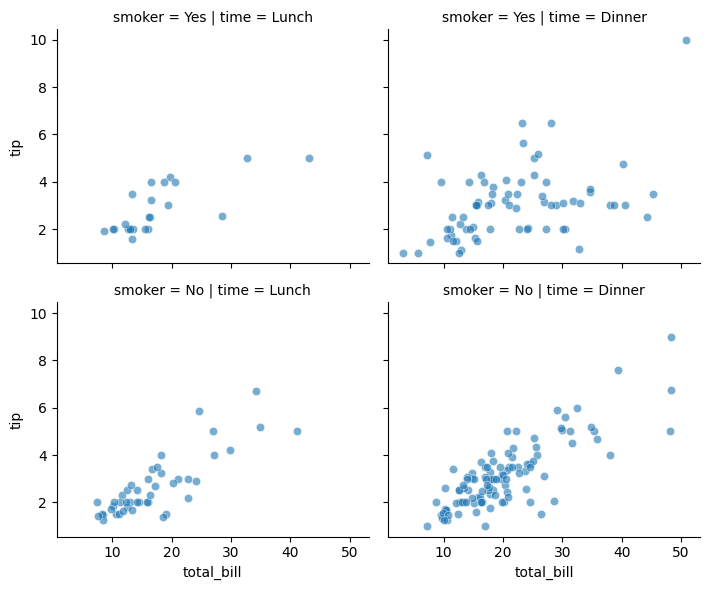

In [43]:
# Alternatively, use the figure-level function to create the same plot
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    row="smoker",
    col="time",
    kind="scatter",
    height=3,
    aspect=1.2,
    alpha=0.6
)

## `PairGrid`: pairwise relationships

### When to use `PairGrid`

* each subplot shows a **different relationship**
* rows and columns correspond to variables

### Minimal example

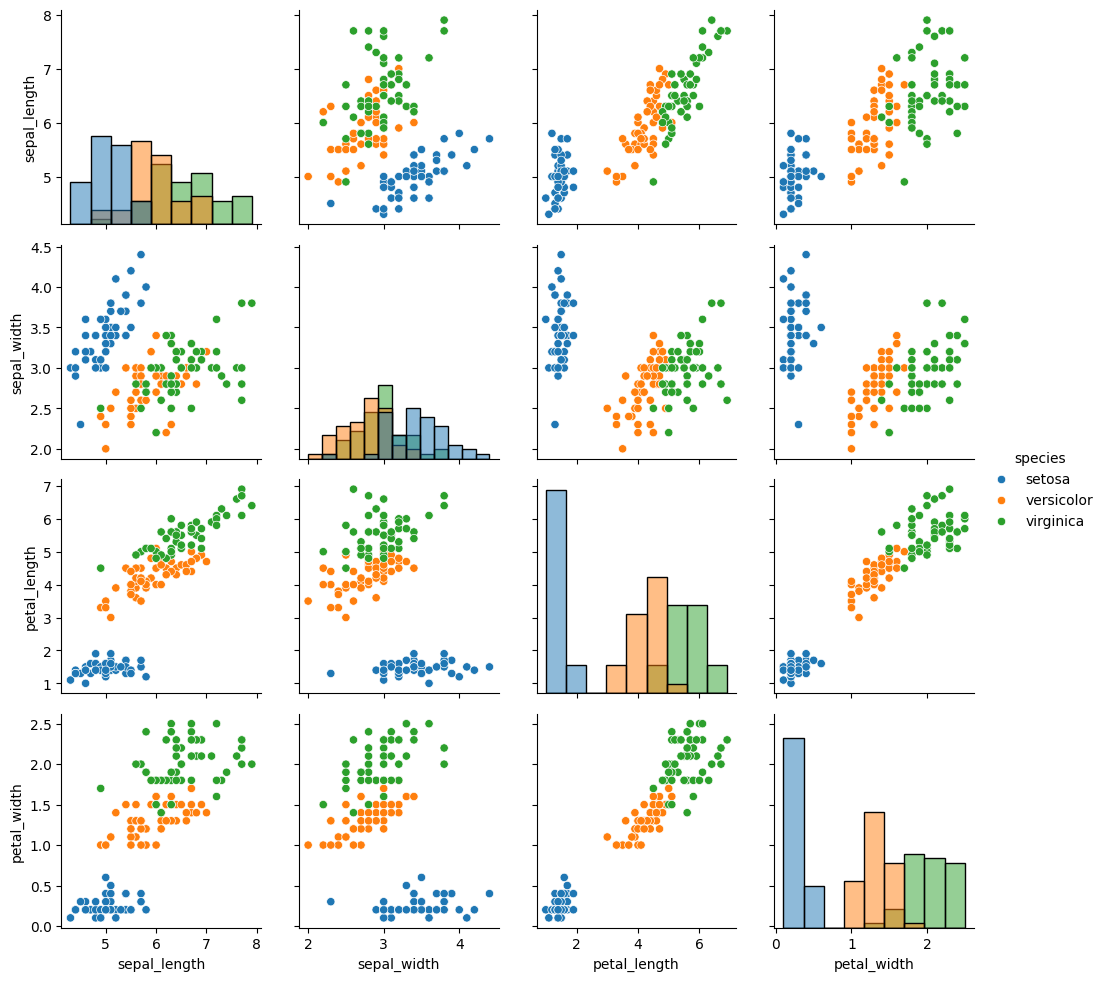

In [44]:
iris = sns.load_dataset("iris")

g = sns.PairGrid(iris, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()




**What this does conceptually:**

* diagonal → univariate distributions
* off-diagonal → pairwise relationships
* `hue` applies consistently across the grid



## `pairplot()` as a shortcut




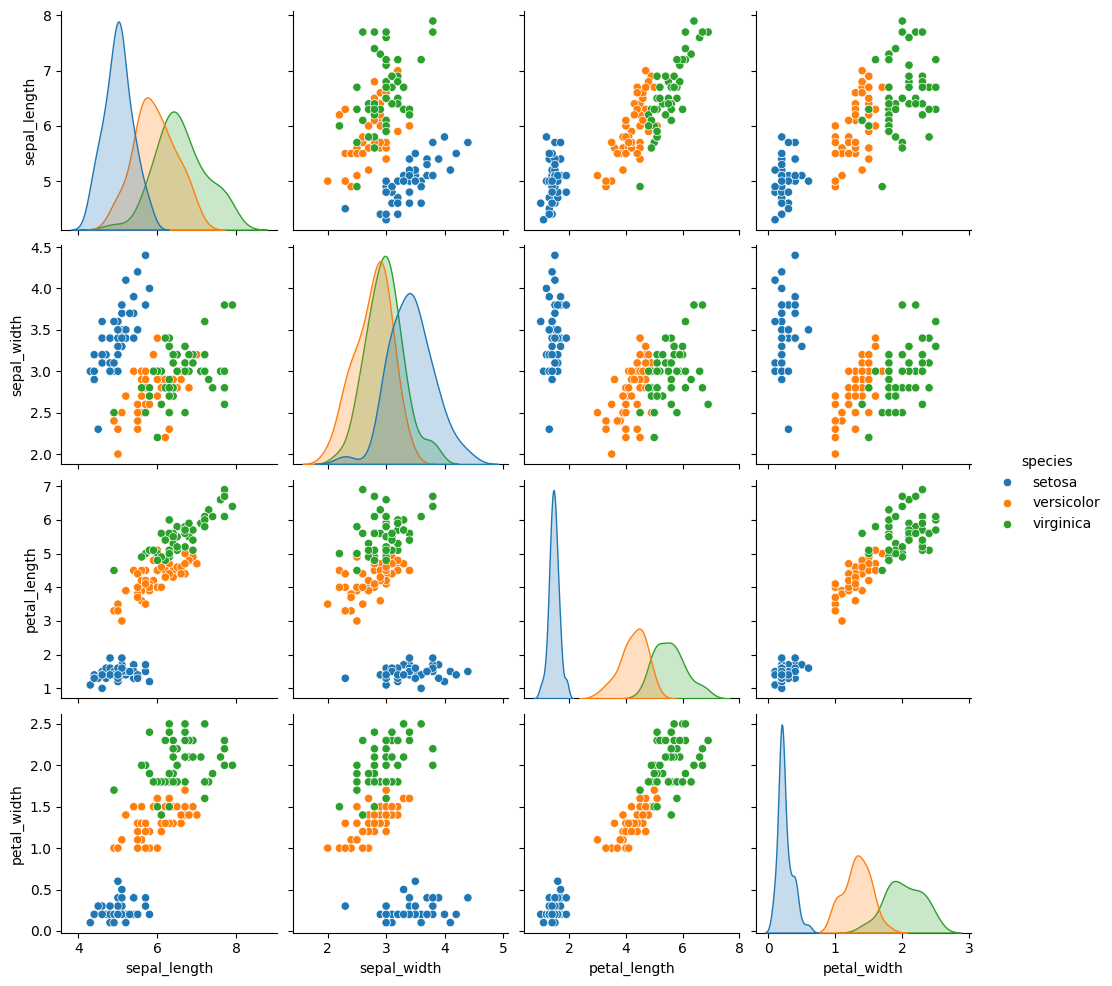

In [45]:
sns.pairplot(iris, hue="species", height=2.5)



* fast exploratory overview
* less control than `PairGrid`
* ideal for first inspection of a dataset